In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Assuming your dataset is named 'sydney_data.csv'
df = pd.read_csv('sydney_data.csv')

In [3]:
# Check for missing values
df.isnull().sum()

# Clean the "Time to CBD (Public Transport) [Town Hall St]" column
df['Time to CBD (Public Transport) [Town Hall St]'] = df['Time to CBD (Public Transport) [Town Hall St]'].str.replace(' minuntes', '')

# Convert data types
df['Time to CBD (Public Transport) [Town Hall St]'] = pd.to_numeric(df['Time to CBD (Public Transport) [Town Hall St]'], errors='coerce')

# Check for missing values again after cleaning and conversion
df.isnull().sum()

Name                                               0
Region                                             0
Population (rounded)*                              0
Postcode                                           0
Ethnic Breakdown 2016                              0
Median House Price (2020)                          1
Median House Price (2021)                         12
% Change                                           0
Median House Rent (per week)                      19
Median Apartment Price (2020)                    122
Median Apartment Rent (per week)                  71
Public Housing %                                   2
Avg. Years Held                                   51
Time to CBD (Public Transport) [Town Hall St]    303
Time to CBD (Driving) [Town Hall St]               2
Nearest Train Station                             71
Highlights/Attractions                           307
Ideal for                                        305
Traffic                                       

In [4]:
print(df.dtypes)

Name                                              object
Region                                            object
Population (rounded)*                             object
Postcode                                           int64
Ethnic Breakdown 2016                             object
Median House Price (2020)                         object
Median House Price (2021)                         object
% Change                                          object
Median House Rent (per week)                      object
Median Apartment Price (2020)                     object
Median Apartment Rent (per week)                  object
Public Housing %                                  object
Avg. Years Held                                  float64
Time to CBD (Public Transport) [Town Hall St]    float64
Time to CBD (Driving) [Town Hall St]              object
Nearest Train Station                             object
Highlights/Attractions                            object
Ideal for                      

In [5]:
# Check unique values in the "Time to CBD (Public Transport) [Town Hall St]" column
print(df['Time to CBD (Public Transport) [Town Hall St]'].unique())

# Check unique values in the "Median House Price (2020)" column
print(df['Median House Price (2020)'].unique())

[40. 30. 20. 35. 10. 22. 55. 45. 60. 25. 15. 50. 65.  8. 12. nan]
['$1,150,000.00' '$1,550,000.00' '$1,500,000.00' '$1,050,000.00'
 '$2,650,000.00' '$1,800,000.00' '$800,000.00' '$1,700,000.00'
 '$2,500,000.00' '$1,400,000.00' '$950,000.00' '$965,000.00'
 '$2,150,000.00' '$1,200,000.00' '$1,900,000.00' '$925,000.00'
 '$2,050,000.00' '$1,250,000.00' '$2,850,000.00' '$2,600,000.00'
 '$1,950,000.00' '$1,650,000.00' '$2,100,000.00' '$2,800,000.00'
 '$1,000,000.00' '$2,000,000.00' '$2,900,000.00' '$3,600,000.00'
 '$1,600,000.00' '$2,250,000.00' '$1,450,000.00' '$855,000.00'
 '$1,300,000.00' '$2,550,000.00' '$1,100,000.00' '$940,000.00'
 '$890,000.00' '$1,480,000.00' '$970,000.00' '$1,750,000.00'
 '$2,400,000.00' '$2,200,000.00' '-' '$4,200,000.00' '$3,550,000.00'
 '$1,350,000.00' '$975,000.00' '$2,300,000.00' '$1,850,000.00'
 '$680,000.00' '$825,000.00' '$830,000.00' '$720,000.00' '$775,000.00'
 '$910,000.00' '$820,000.00' '$755,000.00' '$850,000.00' '$675,000.00'
 '$740,000.00' '$700,000.0

In [6]:
# Remove dollar signs and commas from the "Median House Price (2020)" column
df['Median House Price (2020)'] = df['Median House Price (2020)'].str.replace('[\$,]', '', regex=True)

# Convert the column to a numeric type
df['Median House Price (2020)'] = pd.to_numeric(df['Median House Price (2020)'], errors='coerce')

Correlation with Median House Price (2020): -0.2589294538778912


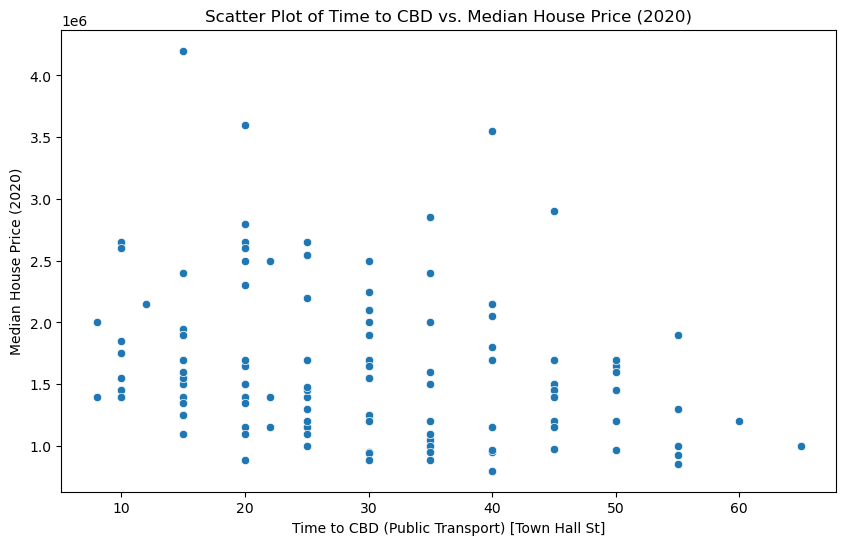

In [7]:
# Calculate correlations
correlation_2020 = df['Time to CBD (Public Transport) [Town Hall St]'].corr(df['Median House Price (2020)'])

print(f"Correlation with Median House Price (2020): {correlation_2020}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time to CBD (Public Transport) [Town Hall St]', y='Median House Price (2020)', data=df)
plt.title('Scatter Plot of Time to CBD vs. Median House Price (2020)')
plt.xlabel('Time to CBD (Public Transport) [Town Hall St]')
plt.ylabel('Median House Price (2020)')
plt.show()


The correlation between "Time to CBD via public transport" and "Median House Price (2020)" is approximately -0.259. This negative correlation suggests that as the time to reach the Central Business District (CBD) via public transport increases, the median house prices tend to decrease, albeit not very strongly.

### Histogram of House Prices: Visualize the distribution of median house prices for a better understanding of the data.

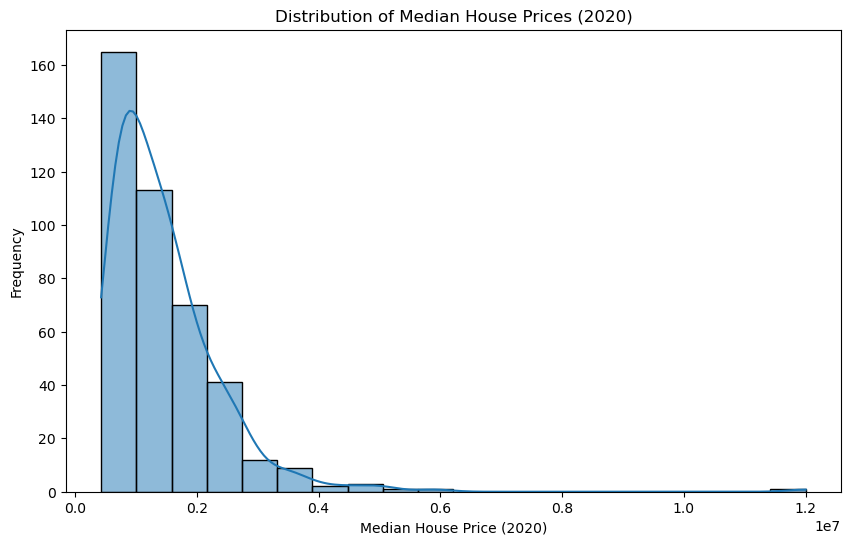

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Median House Price (2020)'], bins=20, kde=True)
plt.title('Distribution of Median House Prices (2020)')
plt.xlabel('Median House Price (2020)')
plt.ylabel('Frequency')
plt.show()


### Box Plot of House Prices by Region: Explore how median house prices vary by region.

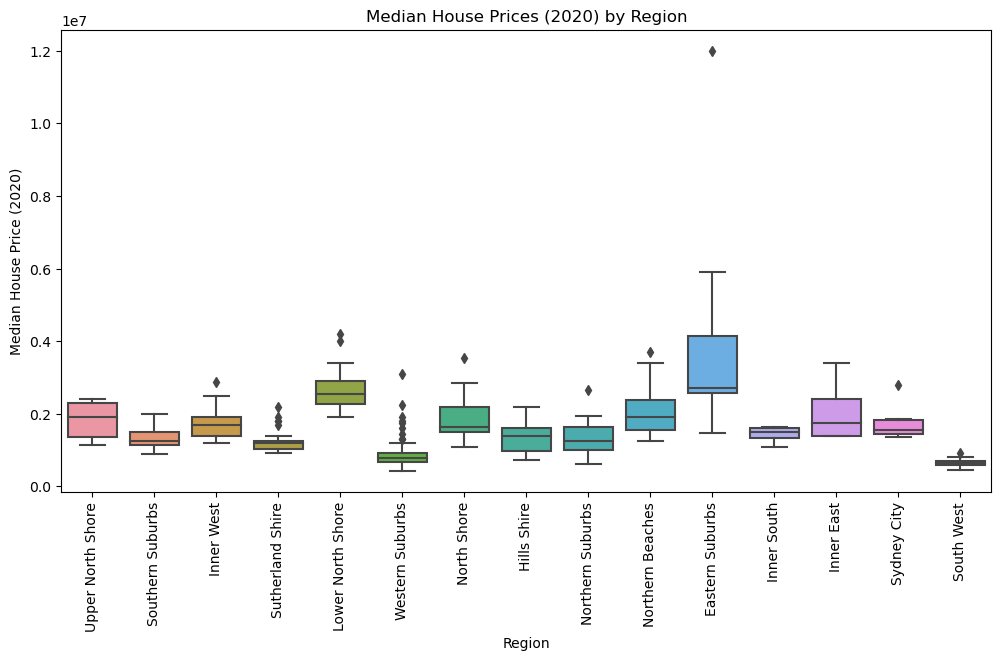

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Median House Price (2020)', data=df)
plt.title('Median House Prices (2020) by Region')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Median House Price (2020)')
plt.show()


### Scatter Plot Matrix: Create a matrix of scatter plots to visualize relationships between multiple numeric variables.

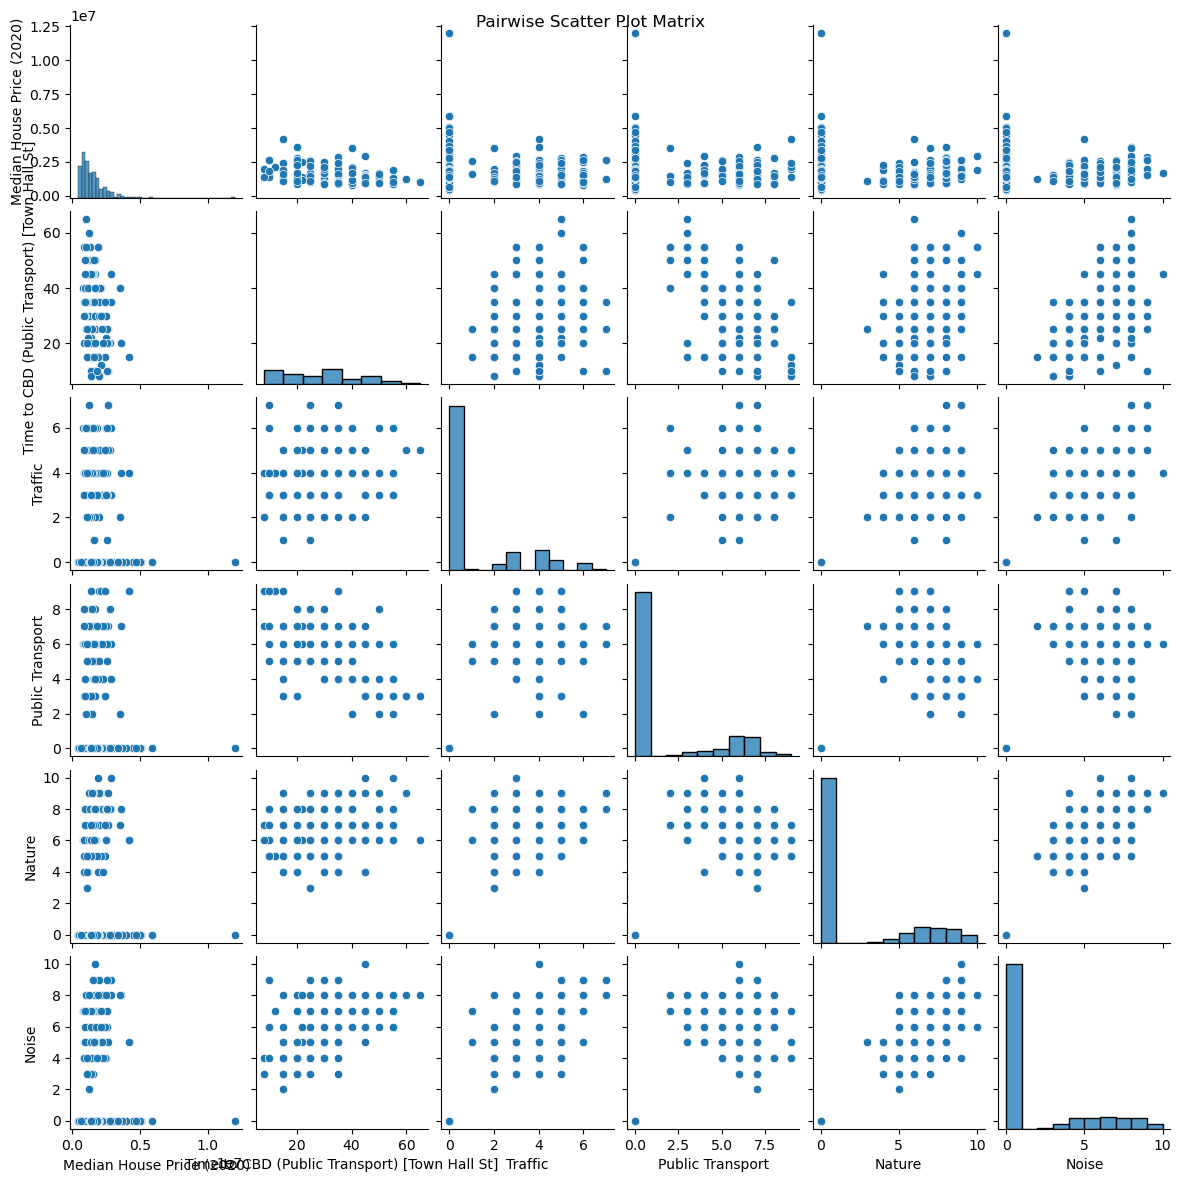

In [11]:
numeric_columns = [
    'Median House Price (2020)',
    'Time to CBD (Public Transport) [Town Hall St]',
    'Traffic',
    'Public Transport',
    'Nature',
    'Noise'
]

sns.pairplot(df[numeric_columns], height=2)
plt.suptitle('Pairwise Scatter Plot Matrix')
plt.show()